In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
dataset_root = 'data/'
#preprocessed_articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
#articles = pd.read_csv(dataset_root + 'articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles['title'] = articles['title'].str.replace('\W', ' ') # Remove special characters from titles
articles['content'] = articles['content'].str.replace('\W', ' ') # Remove special character from content

articles

,title,content,date,author,region,zone
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre


In [3]:
articles

,title,content,date,author,region,zone
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre


In [4]:
import nltk
from nltk.corpus import stopwords
stop_words_italian = stopwords.words('italian')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words= stop_words_italian)
doc_term_matrix = tfidf_vect.fit_transform((articles.title + articles.content).values)

In [6]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [7]:
topic_values = nmf.transform(doc_term_matrix)
articles['topic'] = topic_values.argmax(axis=1)
articles

,title,content,date,author,region,zone,topic
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
...,...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre,0
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre,1
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre,1
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre,1


In [8]:
true_positive = 0
true_negative = 0
false_negative = 0
false_positive = 0

for i in articles.index:
    title = articles.loc[i, 'title']
    content = articles.loc[i, 'content']
    
    dummy_flag = 'coronavirus' in title or 'covid-19' in title or 'coronavirus' in content or 'covid-19' in content or 'covid' in title or 'covid' in content
    covid_flag = articles.loc[i, 'topic'] == 1
    
    #print('dummy_flag = ', str(dummy_flag), ' flagged as' , str(covid_flag))

    if dummy_flag == True and covid_flag == True:
        true_positive += 1
        
    if dummy_flag == True and covid_flag == False:
        false_negative += 1
        #print(title + '\n\n')
        
    if dummy_flag == False and covid_flag == True:
        false_positive += 1
        
    if dummy_flag == False and covid_flag == False:
        true_negative += 1
    
dataset_size = len(articles.index)
print('True positives %.3f%%' % (true_positive / dataset_size * 100))
print('True negatives %.3f%%' % (true_negative / dataset_size * 100))
print('False positives %.3f%%' % (false_positive/ dataset_size * 100))
print('False negatives %.3f%%' % (false_negative/ dataset_size * 100))

print('\nPrecision %.3f%%' % (true_positive*100 / (true_positive + false_positive)))

True positives 36.813%
True negatives 38.728%
False positives 10.287%
False negatives 14.172%

Precision 78.159%


In [67]:


#        [[[[[[[[[[[This was just for debugging purposes]]]]]]]]]]]]]]]



prociv_dataset = pd.read_csv(dataset_root + 'prociv_data.csv')
prociv_dataset = prociv_dataset[prociv_dataset.denominazione_regione != 'P.A. Bolzano']
prociv_dataset.rename(columns = {'data':'date'}, inplace = True)
prociv_dataset.rename(columns = {'denominazione_regione':'region'}, inplace = True)

prociv_dataset['region'] = prociv_dataset['region'].replace(['Emilia-Romagna', 'Friuli Venezia Giulia',"Valle d'Aosta", "P.A. Trento"],
                                                                                          ['Emilia Romagna','Friuli',"Valle d' Aosta", 'Trentino'])        

region_zones = articles.loc[:, ['region', 'zone']].drop_duplicates()
prociv_dataset.merge(region_zones, on = 'region', how = 'inner')
articles

,title,content,date,author,region,zone,topic
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre,1
...,...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre,0
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre,1
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre,1
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre,1


In [68]:
from sklearn.preprocessing import MinMaxScaler #Scaling

def print_plots_by_region(articles_dataset, region):
    # Function starts here
    #print('Region is ', region)
    
    dataset = articles_dataset[articles_dataset.region == region]

    prociv_dataset = pd.read_csv(dataset_root + 'prociv_data.csv')
    prociv_dataset.rename(columns = {'data':'date'}, inplace = True)
    prociv_dataset.rename(columns = {'denominazione_regione':'region'}, inplace = True)

    prociv_dataset = prociv_dataset[prociv_dataset.region != 'P.A. Bolzano']

    prociv_dataset['region'] = prociv_dataset['region'].replace(['Emilia-Romagna', 'Friuli Venezia Giulia',"Valle d'Aosta", "P.A. Trento"],
                                                                                          ['Emilia Romagna','Friuli',"Valle d' Aosta", 'Trentino'])        
      
    prociv_dataset = prociv_dataset[prociv_dataset.region == region]

        
    detected_covid_topics = dataset.loc[:, ['date', 'topic']].groupby('date').count().reset_index()
    region_positives = prociv_dataset.loc[:, ['date', 'totale_positivi']]
    region_new_positives = prociv_dataset.loc[:, ['date', 'nuovi_positivi']]

    #complete_dataset = detected_covid_topics.merge(region_positives, on = 'date', how = 'inner')
    complete_dataset = detected_covid_topics.merge(region_new_positives, on = 'date', how = 'inner')
    
    scaler = MinMaxScaler()
    complete_dataset.iloc[:,1:] = scaler.fit_transform(complete_dataset.iloc[:, 1:])

    
    fig, ax = plt.subplots(figsize=(10, 5))  
    x = complete_dataset['date'] 
    y_1 = complete_dataset['topic']
    y_2 = complete_dataset['nuovi_positivi']

    sns.lineplot(x, y_1, ax = ax);
    sns.lineplot(x, y_2, ax = ax);

    ax.set_xticks(x[::4])
    ax.set_xticklabels(x[::4], rotation=90)

    ax.legend(['Number covid news', 'Number of new cases'])
    plt.xlabel('Date')
    plt.ylabel('Number')
    plt.title('Number of COVID-19 positives for ' + region)
    plt.show(ax)
    

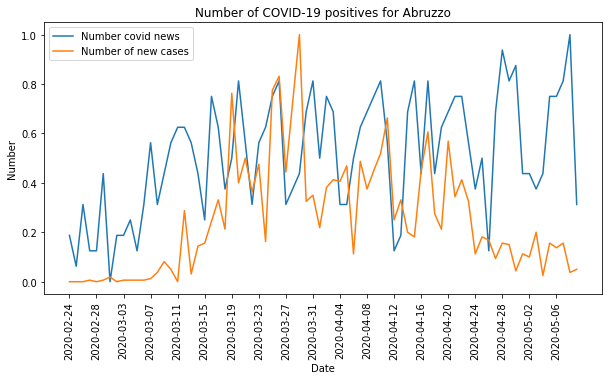

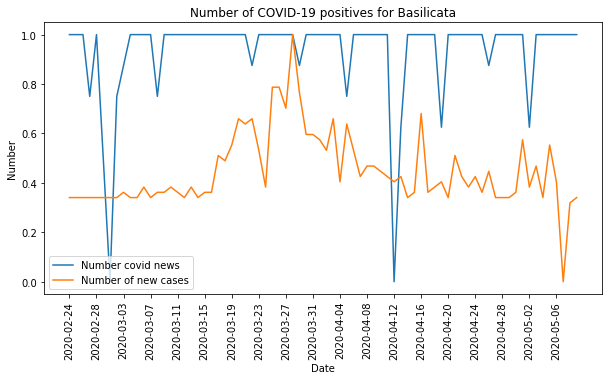

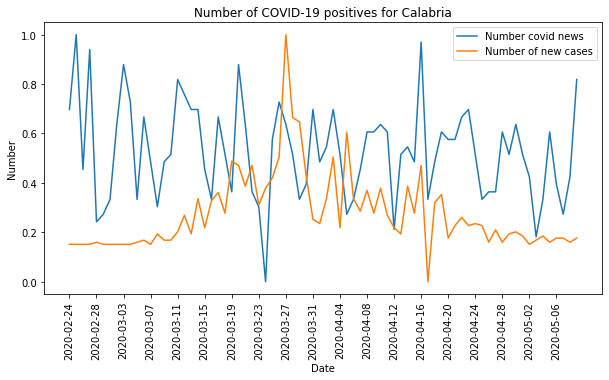

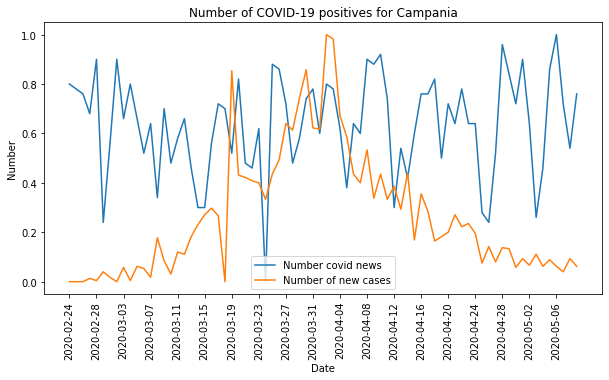

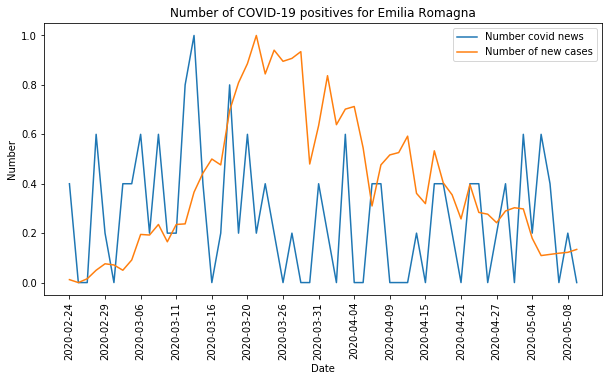

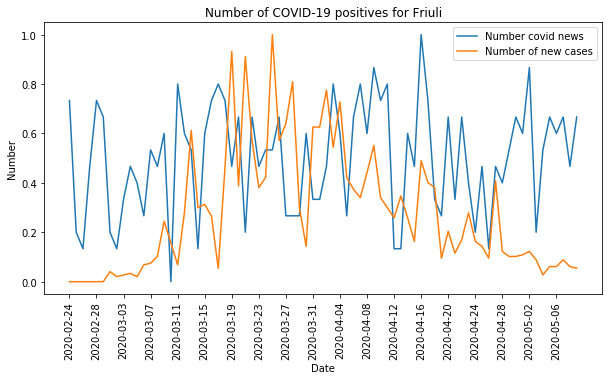

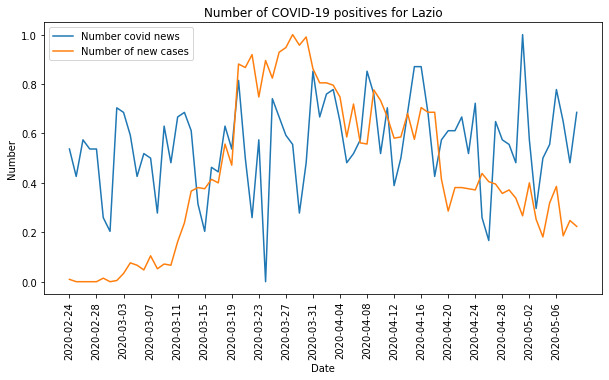

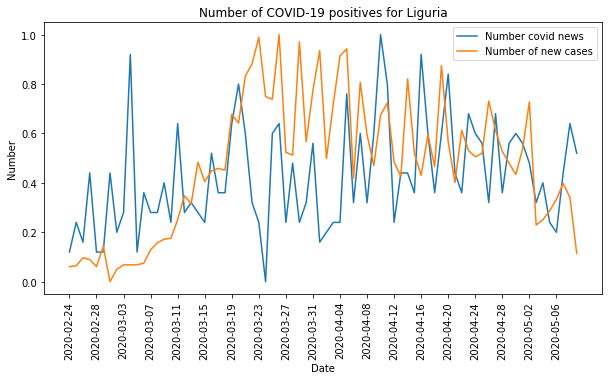

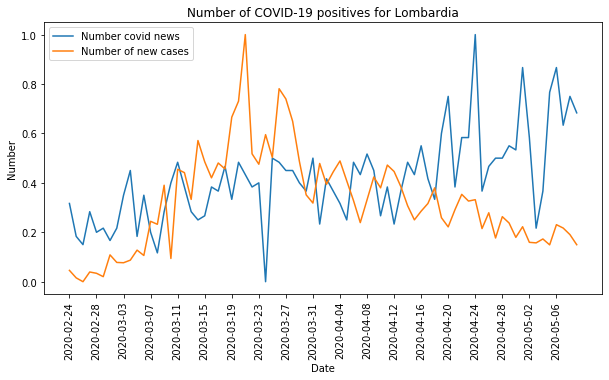

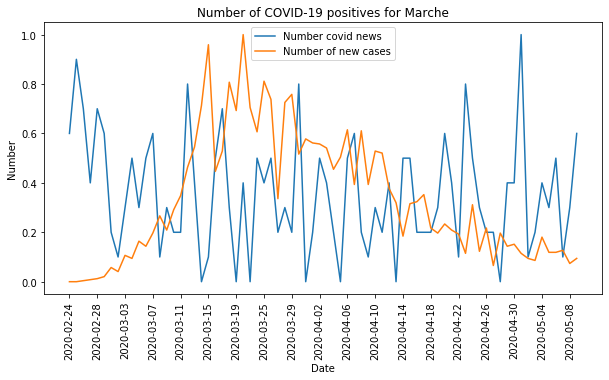

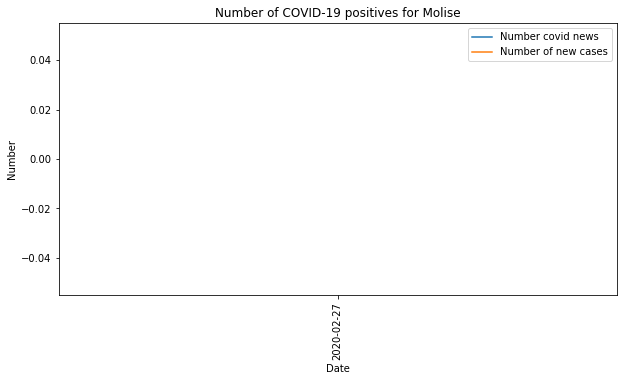

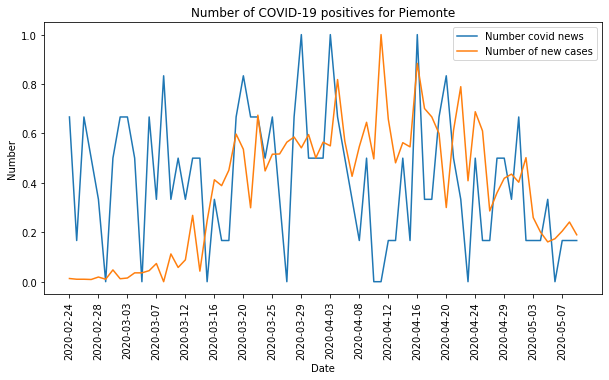

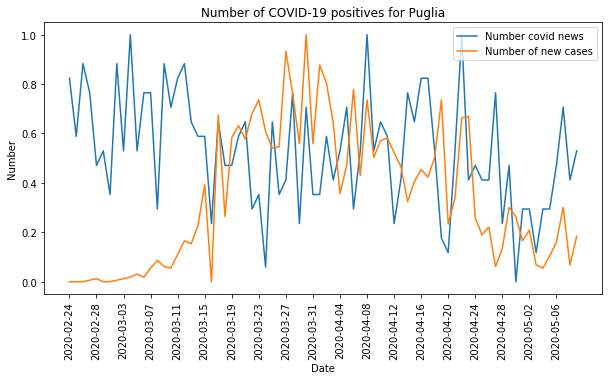

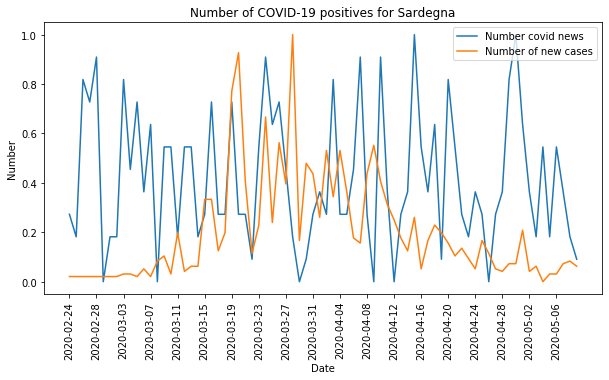

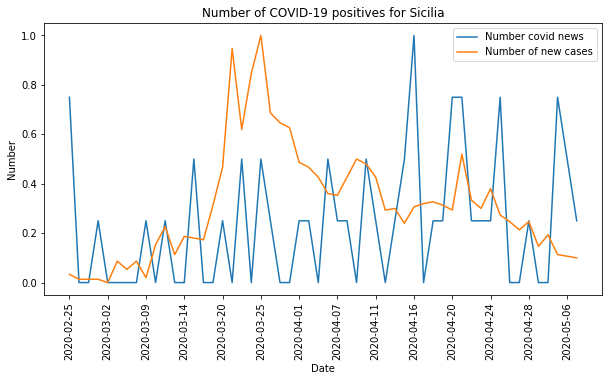

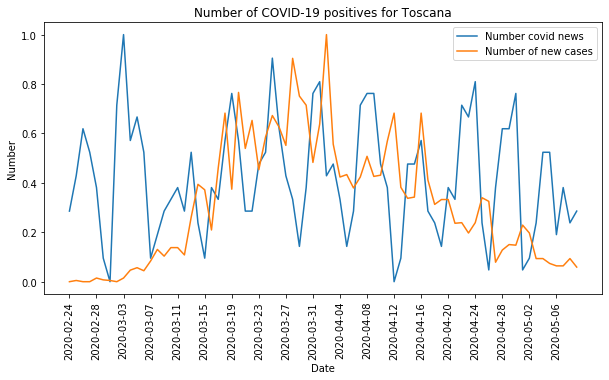

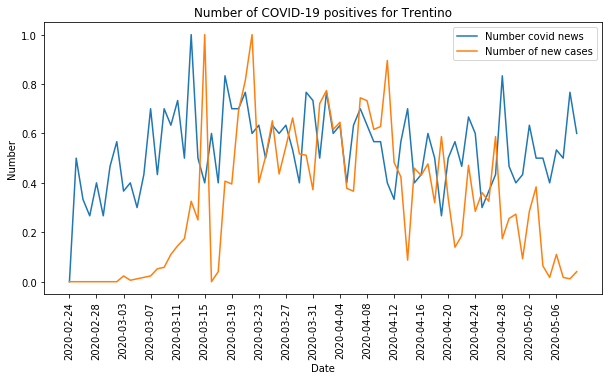

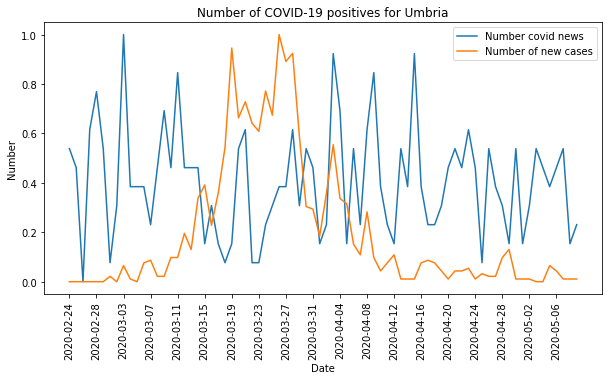

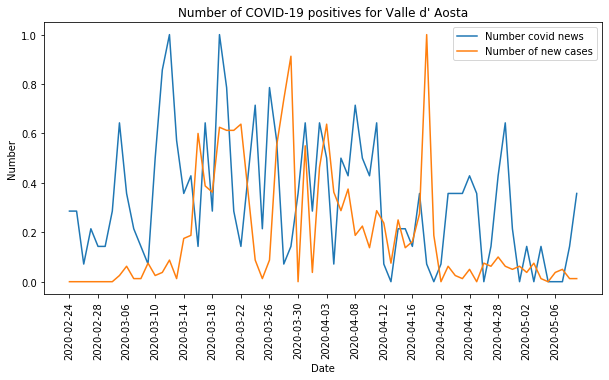

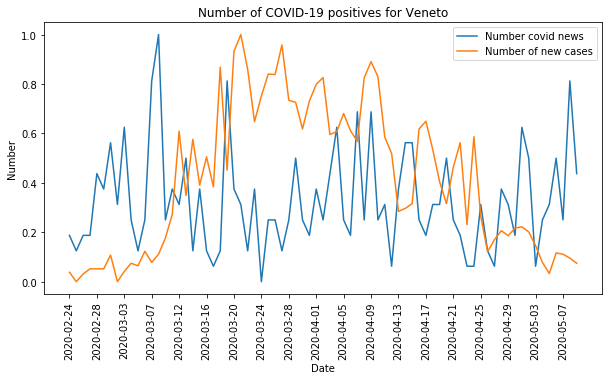

In [69]:
for region in sorted(articles.region.unique().tolist()):
    print_plots_by_region(articles, region)

In [92]:
def print_plots_by_zone(articles_dataset, zone):

    dataset = articles_dataset[articles_dataset.zone == zone]

    prociv_dataset = pd.read_csv(dataset_root + 'prociv_data.csv')
    
    prociv_dataset.rename(columns = {'data':'date'}, inplace = True)
    prociv_dataset.rename(columns = {'denominazione_regione':'region'}, inplace = True)
    prociv_dataset = prociv_dataset[prociv_dataset.region != 'P.A. Bolzano']
    prociv_dataset['region'] = prociv_dataset['region'].replace(['Emilia-Romagna', 'Friuli Venezia Giulia',"Valle d'Aosta", "P.A. Trento"],
                                                                                          ['Emilia Romagna','Friuli',"Valle d' Aosta", 'Trentino'])        
      
        

    region_zones = articles_dataset.loc[:, ['region', 'zone']].drop_duplicates()
    prociv_dataset = prociv_dataset.merge(region_zones, on = 'region', how = 'inner')    
        
        
    prociv_dataset = prociv_dataset[prociv_dataset.zone == zone]
    
    detected_covid_topics = dataset.loc[:, ['date', 'topic']].groupby('date').count().reset_index()
    zone_new_positives = prociv_dataset.loc[:, ['date', 'nuovi_positivi']].groupby('date').sum().reset_index()
    
    
    complete_dataset = detected_covid_topics.merge(zone_new_positives, on = 'date', how = 'inner')
        
    scaler = MinMaxScaler()
    complete_dataset.iloc[:,1:] = scaler.fit_transform(complete_dataset.iloc[:, 1:])

    fig, ax = plt.subplots(figsize=(10, 5))  
    x = complete_dataset['date'] 
    y_1 = complete_dataset['topic']
    y_2 = complete_dataset['nuovi_positivi']

    sns.lineplot(x, y_1, ax = ax);
    sns.lineplot(x, y_2, ax = ax);

    ax.set_xticks(x[::4])
    ax.set_xticklabels(x[::4], rotation=90)

    ax.legend(['Number covid news', 'Number of new cases'])
    plt.xlabel('Date')
    plt.ylabel('Number')
    plt.title('Number of COVID-19 positives for ' + zone)
    plt.show(ax)
    
    
    return detected_covid_topics    

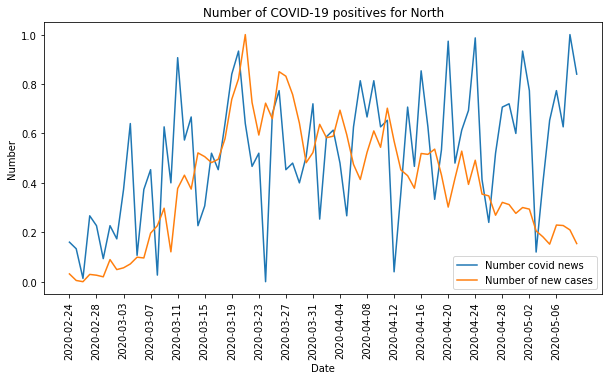

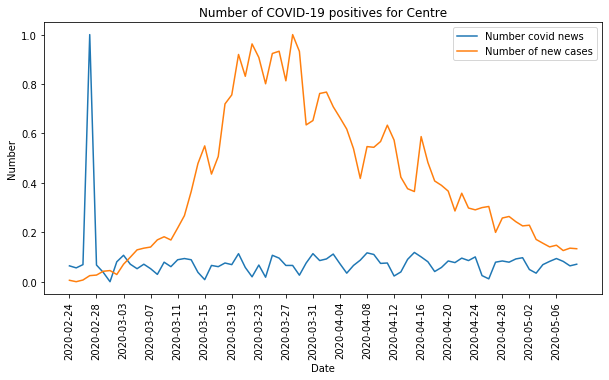

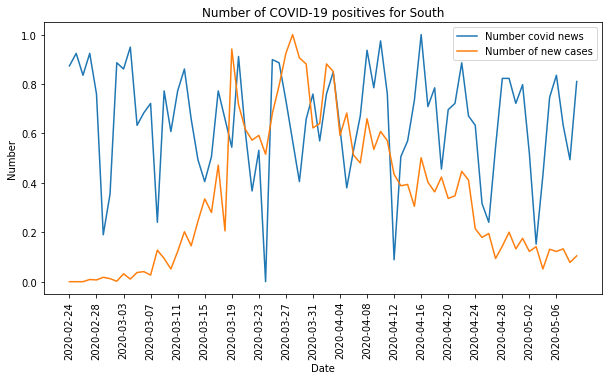

In [95]:

for zone in ['North', 'Centre', 'South']:
    print_plots_by_zone(articles, zone)
